# Instructions

- Run the notebook with Runtime -> Run all (or ctrl+F9).
- Scroll down to the 'Upload .dat and .seq file' section
- Hit the 'Browse...' button once it is executing
- Select a .dat and associated .seq file to upload (only upload two files at a time!)

# Initialization

In [ ]:
import importlib
if importlib.util.find_spec('pypulseq') is None:
    !pip install -q git+https://github.com/imr-framework/pypulseq.git pymapvbvd

import math
import numpy as np
import matplotlib.pyplot as plt

import pypulseq as pp
import mapvbvd

# Download utils.py
!wget -nc https://raw.githubusercontent.com/pulseq/MR-Physics-with-Pulseq/main/utils/utils.py
from utils import reconstruct, read_raw_data, plot_nd

Downloading...
From (original): https://drive.google.com/uc?id=1VijI4Iv1_PU0isi4CfdR6g-2kXuYYzA-
From (redirected): https://drive.google.com/uc?id=1VijI4Iv1_PU0isi4CfdR6g-2kXuYYzA-&confirm=t&uuid=e633def6-fe62-4f97-a3b4-fcc49cba06a6
To: /content/utils.py
100% 36.3k/36.3k [00:00<00:00, 59.9MB/s]


# **Reconstruct images from acquired raw kspace data**

**Upload .dat and .seq file**

In [ ]:
from google.colab import files
uploaded = files.upload();

assert len(uploaded.keys()) == 2, 'Upload exactly two files!'

filename = [x for x in uploaded.keys() if x.endswith('.dat')]
if filename == []:
    raise ValueError('No .dat file uploaded')
filename = filename[0]

seq_filename = [x for x in uploaded.keys() if x.endswith('.seq')]
if seq_filename == []:
    raise ValueError('No .seq file uploaded')
seq_filename = seq_filename[0]

AssertionError: Upload exactly two files!

**Load data using pymapvbvd**

In [ ]:
# Load data from twix file (shape = [N_coils, N_meas, N_adc])
kdata = read_raw_data(filename)

# Load associated sequence file
seq = pp.Sequence()
seq.read(seq_filename, detect_rf_use=True)

assert seq.adc_times()[1].shape[0] == kdata.shape[1], 'Sequence and k-space data do not have the same number of measurements! The sequence probably contains NAV labels!'

pymapVBVD version 0.5.7
Software version: VD


Scan 1/1, read all mdhs: 0.00B [00:00, ?B/s]

read data:   0%|          | 0/504 [00:00<?, ?it/s]

**Reconstruction (method automatically detected)**

Automatically detected non-Cartesian sequence (failed integer coordinate check)
Automatically detected 2D sequence
Automatically detected matrix size: (96, 96)
Detected multi-slice sequence! (6 slices)


LinearLeastSquares:   0%|          | 0/10 [00:00<?, ?it/s]

LinearLeastSquares:   0%|          | 0/10 [00:00<?, ?it/s]

LinearLeastSquares:   0%|          | 0/10 [00:00<?, ?it/s]

LinearLeastSquares:   0%|          | 0/10 [00:00<?, ?it/s]

LinearLeastSquares:   0%|          | 0/10 [00:00<?, ?it/s]

LinearLeastSquares:   0%|          | 0/10 [00:00<?, ?it/s]

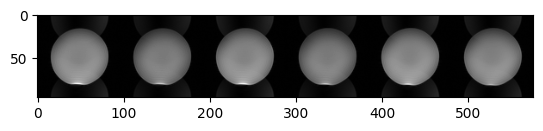

In [ ]:
rec = reconstruct(kdata, seq)

plot_nd(rec)

Automatically detected non-Cartesian sequence (failed integer coordinate check)
Automatically detected 2D sequence
Automatically detected matrix size: (96, 96)
Detected multi-slice sequence! (6 slices)


LinearLeastSquares:   0%|          | 0/10 [00:00<?, ?it/s]

LinearLeastSquares:   0%|          | 0/10 [00:00<?, ?it/s]

LinearLeastSquares:   0%|          | 0/10 [00:00<?, ?it/s]

LinearLeastSquares:   0%|          | 0/10 [00:00<?, ?it/s]

LinearLeastSquares:   0%|          | 0/10 [00:00<?, ?it/s]

LinearLeastSquares:   0%|          | 0/10 [00:00<?, ?it/s]

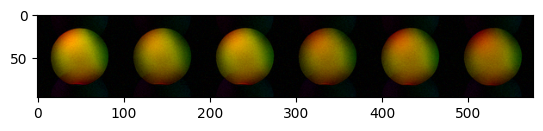

In [ ]:
# Reconstruct only first coil element, plot complex data with pretty colours!
rec = reconstruct(kdata[[0]], seq)

plot_nd(rec, complex=True)